# OASIS INFOBYTE DATASCIENCE INTERNSHIP

## TASK 5- SALES PREDICTION USING PYTHON



### Akshay Saini

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset

ads_df = pd.read_csv('Advertising.csv')
ads_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
# Shape of Dataframe

ads_df.shape

(200, 5)

In [9]:
ads_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      int64  
 1   TV          5 non-null      float64
 2   Radio       5 non-null      float64
 3   Newspaper   5 non-null      float64
 4   Sales       5 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 328.0 bytes


In [10]:
#we don't need the 1st column so let's drop that

ads_df = ads_df.iloc[:,1:]

In [11]:
ads_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
#check for null values

ads_df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
ads_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualisation

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


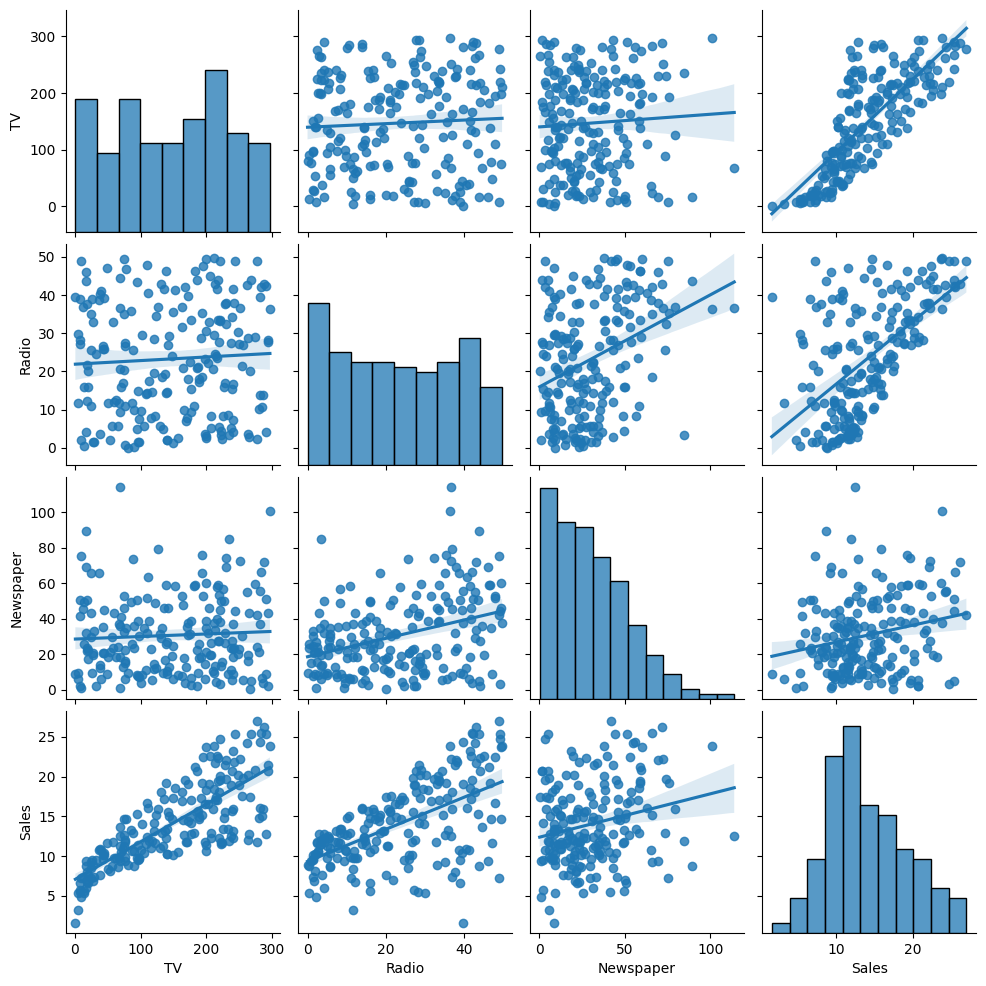

In [15]:
sns.pairplot(ads_df,kind="reg")

<Axes: xlabel='Newspaper', ylabel='Sales'>

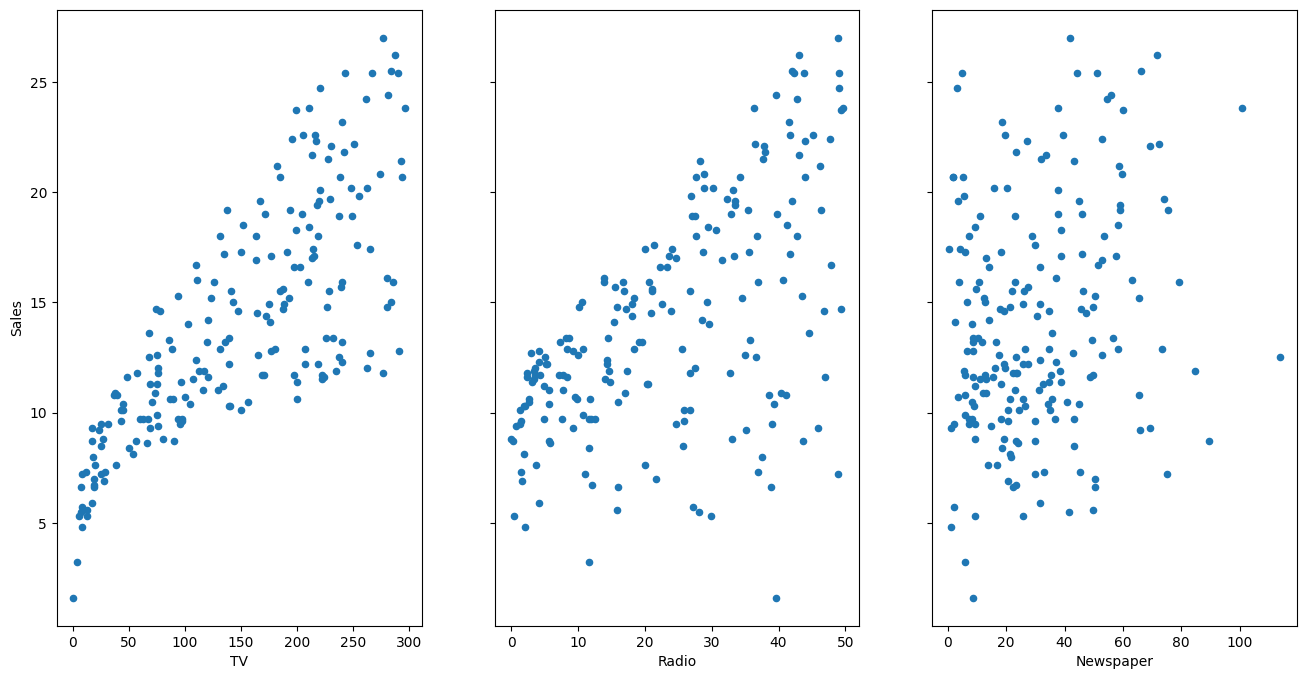

In [16]:
fig,axs= plt.subplots(1,3,sharey=True)
ads_df.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
ads_df.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
ads_df.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

In [17]:

#rmoving the outlier from newspaper

ads_df = ads_df[ads_df['Newspaper']<=90]
ads_df.shape

(198, 4)

In [18]:
ads_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


In [19]:
# Separating input and output data

features_df = ads_df.drop(columns=['Sales'])
target = ads_df['Sales']

In [20]:
features_df.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [21]:
target.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Splitting the Dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(features_df, target,test_size=0.2)

In [26]:
x_train.tail()

,TV,Radio,Newspaper
14,204.1,32.9,46.0
48,227.2,15.8,49.9
177,170.2,7.8,35.2
113,209.6,20.6,10.7
80,76.4,26.7,22.3


In [27]:
y_test.tail()

79     11.0
93     22.2
70     18.3
81     12.3
104    20.7
Name: Sales, dtype: float64

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [30]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler = StandardScaler()
oe = OrdinalEncoder()

### Random Forest Regression Model

In [31]:
#Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor(n_estimators=10,random_state=0)
pipe = make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r = pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9703045106144204

This model gives the accuracy of **97.03%**

In [32]:
#Let's Check predict function working Good or Not

pipe.predict([[283.6,42.0,66.2]]) #Original ans 25.5

array([23.5])

In [33]:
pipe.predict([[112.9,17.4,38.6]]) #Original ans 11.9

array([12.61])

In [34]:
import pickle

In [35]:
pickle.dump(pipe,open('sales.pkl','wb'))